## 4.5 Control on 2D Plots

### 4.5.1 Discrete Levels

Smooth color tables like the above are nice and appealing, but the human eye is not trained to see such small differences in colors. For example. it would be quite difficult to tell which temperature does the coast of Peru have (above 280K? or below?). Sometimes, discrete levels are the way to go: 

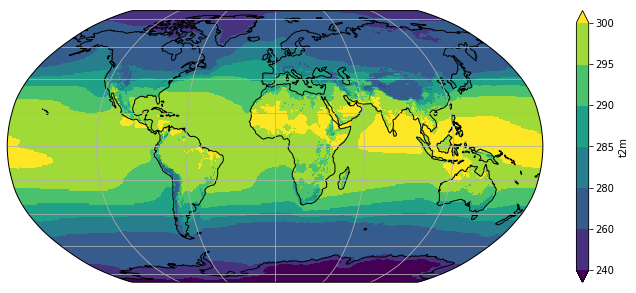

In [24]:
ax = plt.axes(projection=ccrs.Robinson())
t2tavg.plot(ax=ax, transform=ccrs.PlateCarree(), levels = [240, 260, 280, 285, 290, 295, 300]) 
ax.coastlines(); ax.gridlines();

You can either specify the keyword argument **levels** with a list of values that determine the different levels (as above) or give a single value. This value determines how many levels you want to create (e.g. levels = 12). Furthermore, we can set the minimum/maximum value that we want to represent in our colorbar by specifying the `vmin` / `vmax` keyword argument in our plot function.
Let's try it:

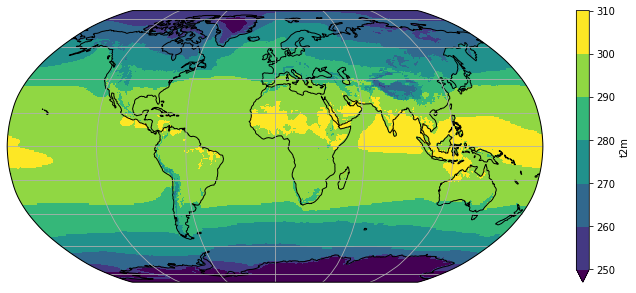

In [25]:
ax = plt.axes(projection=ccrs.Robinson())
t2tavg.plot(ax=ax, transform=ccrs.PlateCarree(), levels = 7, vmin = 250, vmax = 310) 
ax.coastlines(); ax.gridlines();

Outliers in the data often have an extreme effect on the output of the plot: E.g. we have a outlier in 2m temperature data of 500K. This means, that our automatically generated colorbar will go up until 500 K! This washes out the real observed pattern and makes it hard to distinguish between values that are reasonable. An easy way to visualize the data without the outliers is to pass the parameter `robust=True`. This will use the 2nd and 98th percentiles of the data to compute the color limits.

### 4.5.2 Colormaps

Python automatically choses the colorbar for our plots, that the program thinks would fit best. So if we now change our 2m temperature from Kelvin to °C, python will chose another colorbar:

In [26]:
t2ctavg = t2tavg - 273.15

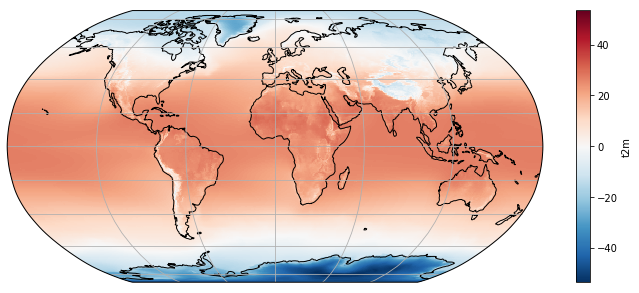

In [27]:
ax = plt.axes(projection=ccrs.Robinson())
t2ctavg.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines(); ax.gridlines();

We notice, that python decided for a two sided color scheme! This seams reasonable, since we now have values bigger and smaller than zero. Still, the plot is not quite perfect yet. We also notice, that with this color scheme the data range is mostly dictated by very cold temperatures in Antarctica. Let's change this first, by introducing levels and min/max values for the colorbar.

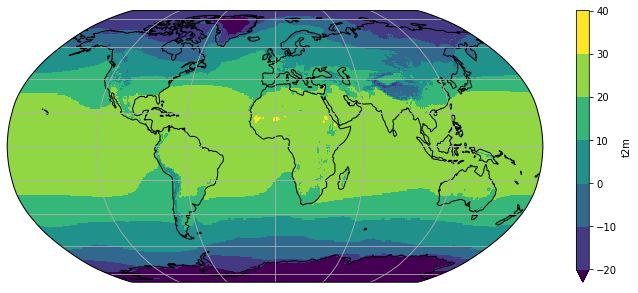

In [28]:
ax = plt.axes(projection=ccrs.Robinson())
t2ctavg.plot(ax=ax, transform=ccrs.PlateCarree(), levels = 7, vmin = -20, vmax = 40) 
ax.coastlines(); ax.gridlines();

Well, now we have a better color distribution, but python jumped back into the default colormap! That's not what we actually wanted. So it is best, if we specify what our colormap should look like. We can do this, by passing the `cmap = 'your_colormap'` to the plot method. 

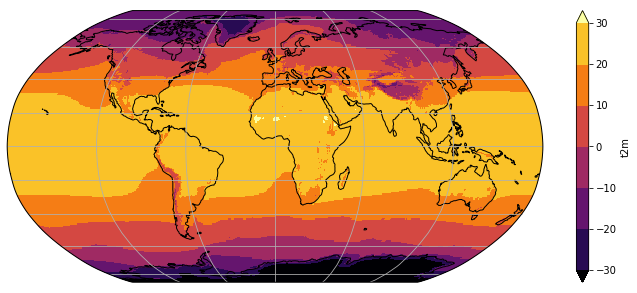

In [29]:
ax = plt.axes(projection=ccrs.Robinson())
t2ctavg.plot(ax=ax, transform=ccrs.PlateCarree(), levels = 7, vmin = -30, vmax = 30, cmap = 'inferno') 
ax.coastlines(); ax.gridlines();

There are a lot of different colormaps available. Look [here](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html), to get an overview and chose the most appropriate one for your plots!

As a general overwiev:

* **precipitation data**: `blues`, `YlGnBu` work quite good

* **terrain heights**: `terain`

* **temperature**: `inferno`, `hot_r`, `coolwarm` 

* **wind data**: e.g. `cool` 

This is just a suggestion, play around to find the colormap that fits your needs best.

Furthermore, we can control the settings of the **colorbar** that is displayed, by passing  `cbar_kwargs={}` arguments to the plot method. E.g. change the labeling of the cbar: `cbar_kwargs={'label':'my_label'}`.

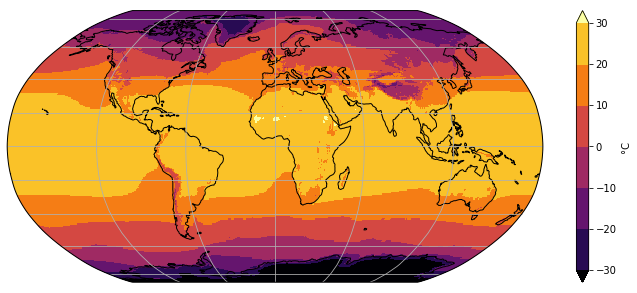

In [30]:
ax = plt.axes(projection=ccrs.Robinson())
t2ctavg.plot(ax=ax, transform=ccrs.PlateCarree(), levels = 7, vmin = -30, vmax = 30, cmap = 'inferno', 
             cbar_kwargs={'label': '°C'}) 
ax.coastlines(); ax.gridlines();

If we create a irregularly spaced level list, we can adjust the colorbar so that the the spacing will be proportional! Therefore, we need to specify the `cbar_kwargs={'spacing':'proportional'}`.

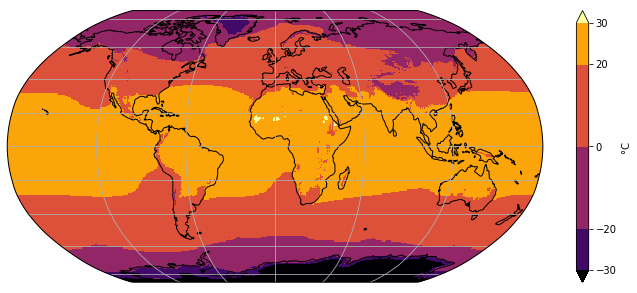

In [31]:
ax = plt.axes(projection=ccrs.Robinson())
t2ctavg.plot(ax=ax, transform=ccrs.PlateCarree(), levels = [-30,-20, 0, 20, 30], cmap = 'inferno', 
             cbar_kwargs={'label': '°C', 'spacing':'proportional'}) 
ax.coastlines(); ax.gridlines();

Another useful thing is, that we can also determine, how many ticks are displayed in the colorbar. By default, python sets the ticks according to your `levels`. 

Anyway, we can also tick every second value of our `levels`:

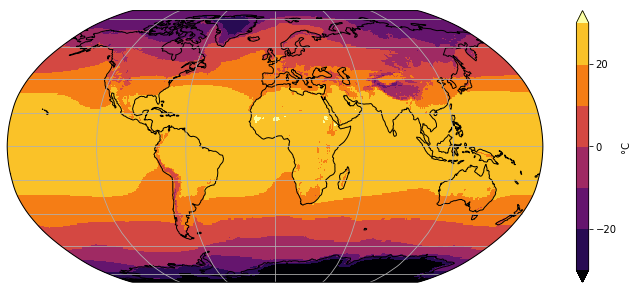

In [32]:
ax = plt.axes(projection=ccrs.Robinson())
t2ctavg.plot(ax=ax, transform=ccrs.PlateCarree(), levels = 7, vmin = -30, vmax = 30, cmap = 'inferno', 
             cbar_kwargs={'label': '°C', 'ticks': [-20,0,20]}) 
ax.coastlines(); ax.gridlines();

As for 1D plots, you can set a title for the plot, or give a different figure size:

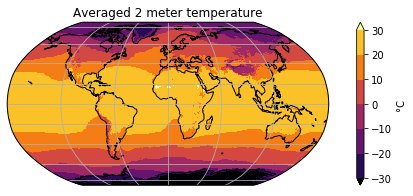

In [33]:
fig = plt.figure(figsize = [10, 3])
ax = plt.axes(projection=ccrs.Robinson())
t2ctavg.plot(ax=ax, transform=ccrs.PlateCarree(), levels = 7, vmin = -30, vmax = 30, cmap = 'inferno', 
             cbar_kwargs={'label': '°C'})  
ax.coastlines(); ax.gridlines();
ax.set_title('Averaged 2 meter temperature');


For more information about plotting parameters, a look at xarray's [documentation](http://xarray.pydata.org/en/stable/generated/xarray.plot.pcolormesh.html) might be helpful.


### 4.5.3 Plot types

**Imshow**

There are several different possibilities how to visualize a plot 2D plot. We recall the Hovmöller Plot from above:

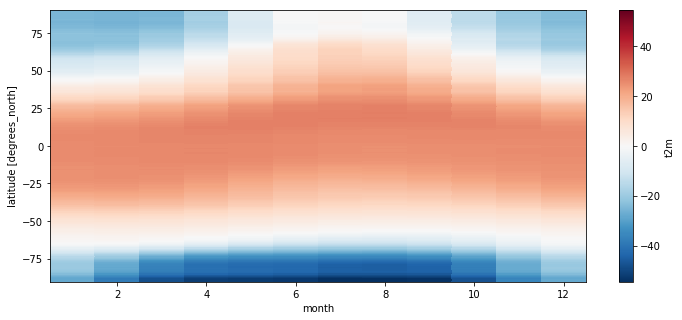

In [34]:
t2m_avg = ds.t2m.mean(dim = 'longitude'); #average over longitudes
t2m_grouped = t2m_avg.groupby('time.month').mean(dim = 'time') - 273.15; #groupby, average over month + convert into °C
t2m_grouped.T.plot(); # the "T" in here means "transpose" and exchanges the axes that are plotted:

And notice the following: This plot is quite  "pixellized"! Xarray's method of choice to display 2d data is to represent it as if it was an "image". This type of plot it called `imshow` in python and is the default plot type for a 2D plot. With `imshow`, we can also show images of pictures:


(-0.5, 599.5, 224.5, -0.5)

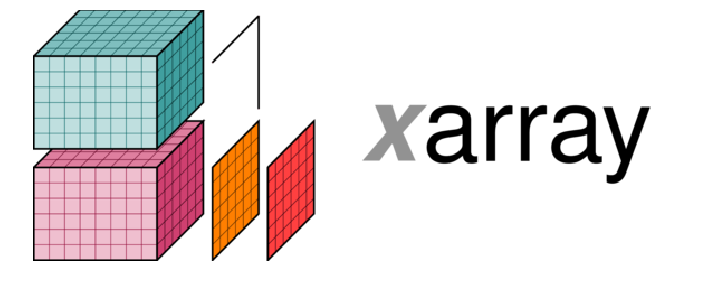

In [36]:
image = plt.imread('img/xarraylogo.png') # read the image

plt.imshow(image) #create an axes
plt.axis('off')  # get rid of x-axis and y-axis

**Pcolormesh**

This creates a pseudocolor plot with a non-regular rectangular grid. Pcolormesh does not
interpolate, but shows the value in each quadrilateral as a block of
solid color, so it is more like an image compared to contourf (see underneath).



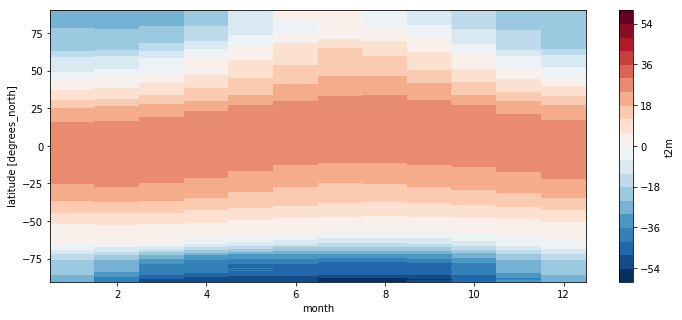

In [37]:
t2m_avg = ds.t2m.mean(dim = 'longitude');
t2m_grouped = t2m_avg.groupby('time.month').mean(dim = 'time') - 273.15; 
t2m_grouped.T.plot.pcolormesh(levels = 20); 

There are data sets and situations for which pcolormesh as well as contourf can be appropriate, and other cases where one is clearly better than the other.  For a somewhat noisy field, pcolormesh is usually better; it allows one to see the signal and the noise, and let one's eye pick out the former.  Isolated extreme values are represented better with
pcolormesh.  For smoother fields and for seeing large-scale structure, contourf may be more appropriate. 

**Contourf**

Contourf creates a filled contour plot containing the isolines of the temperature data. Python automatically selects the contour lines to display. 

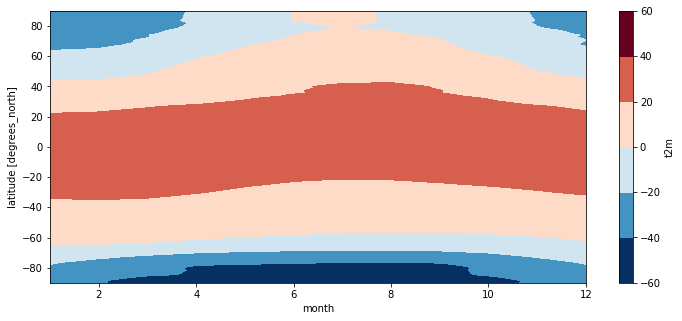

In [38]:
t2m_avg = ds.t2m.mean(dim = 'longitude');
t2m_grouped = t2m_avg.groupby('time.month').mean(dim = 'time') - 273.15; 
t2m_grouped.T.plot.contourf(); 

This does not look very useful. As for the colormaps, you can change the number of isolines displayed by specifying the keyword argument `levels` and change the colormap with `cmap`, give minima and maxima values,...:


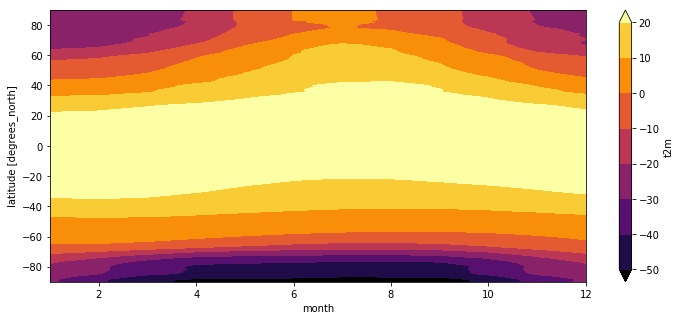

In [39]:
t2m_grouped.T.plot.contourf(levels = np.arange(-50, 21, 10), cmap = 'inferno', vmin = -50, vmax = 25); 


**Notice**: This time we created the levels by creating a numpy array! The array goes from -60 to 40 (last value not inclueded) in steps of 10. 

We can also set the `extend` of the plot. This argument determines, whether the values that lie outside the range defined in `lebels` are to be colored or not. You can set `'extend'` to `'neither'` (colors none of the values outside the levels range), `'both'` (colors both values: above and below the levels range), `'max'` (colors only the values above) or `'min'` (colors only the values below. By default, the extend argument is adapts to your levels argument. If there are any values that exceed the levels range, they will be colored. If there are no, the colorbar will only display the range of the levels argument.

Let's try the different settings:

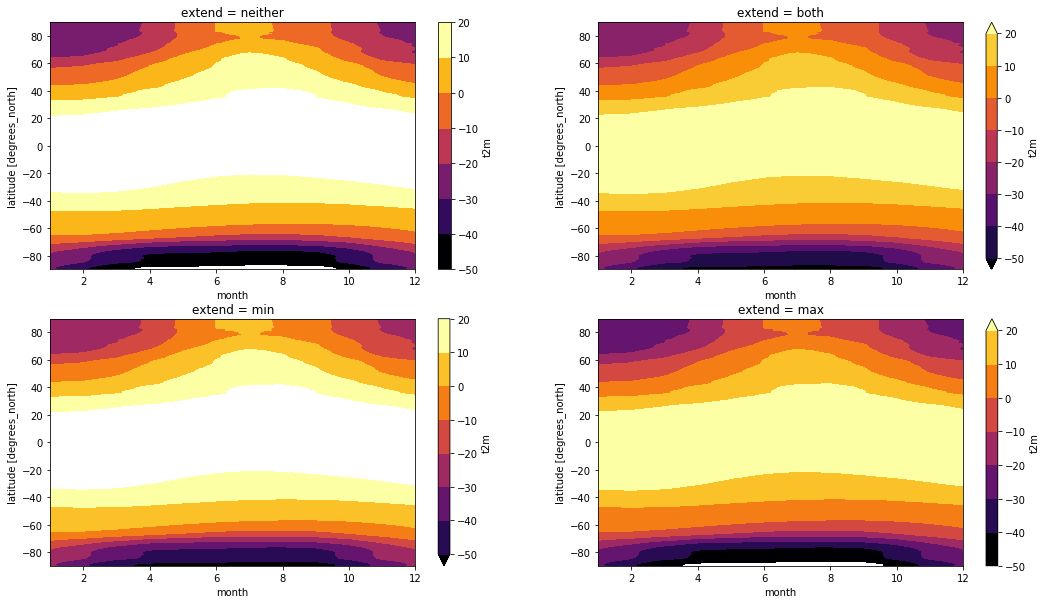

In [40]:
fig = plt.figure(figsize=(18, 10))
ax = plt.subplot(2,2,1)
t2m_grouped.T.plot.contourf(levels = np.arange(-50, 21, 10), cmap = 'inferno', extend = 'neither'); 
ax.set_title('extend = neither');
ax = plt.subplot(2,2,2)
t2m_grouped.T.plot.contourf(levels = np.arange(-50, 21, 10), cmap = 'inferno', extend = 'both'); 
ax.set_title('extend = both');
ax = plt.subplot(2,2,3)
t2m_grouped.T.plot.contourf(levels = np.arange(-50, 21, 10), cmap = 'inferno', extend = 'min'); 
ax.set_title('extend = min');
ax = plt.subplot(2,2,4)
t2m_grouped.T.plot.contourf(levels = np.arange(-50, 21, 10), cmap = 'inferno', extend = 'max'); 
ax.set_title('extend = max');


**Contour**

This will create a plot containing the contour lines of the given data, in our case 2m temperature. 

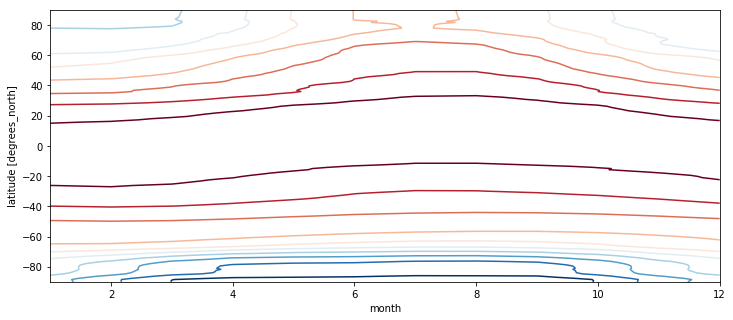

In [41]:
t2m_avg = ds.t2m.mean(dim = 'longitude');
t2m_grouped = t2m_avg.groupby('time.month').mean(dim = 'time') - 273.15; 
t2m_grouped.T.plot.contour(levels = np.arange(-48,25,8)); 

Here, it does not seem to make a lot of sense. Anyway, e.g. for a pressure distribution in x-y plane it can become a useful feature. The parameter setting works as for the above plot types. Still, we can lern what features this plot has and how we can modify them. The bad thing right now is, that our contourlines do not have any labels, so we do actually not have any clue about the values of the displayed data. 

We can change this by creating some labeling! This works with the `plt.clabel(CS, levels, fontsize)`. 

Let's try it:

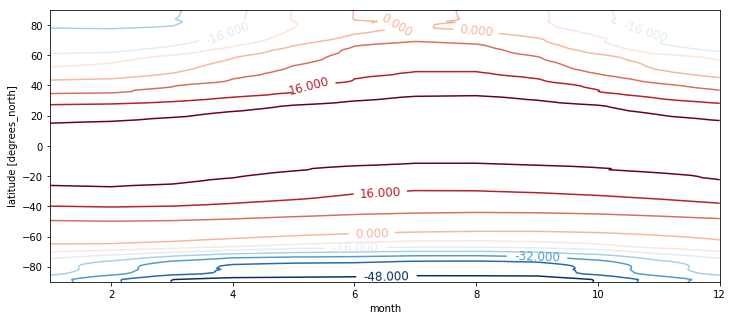

In [42]:
CS = t2m_grouped.T.plot.contour(levels = np.arange(-48,25,8)); #CS is the object that is returned by the contour method!
plt.clabel(CS, np.arange(-48,25,16), fontsize = 'large'); #label every second contourline!

CS is a **positional argument** (MUST be given in order to make the method work. The levels array and fontsize are optional. CS is the object that is returned by contour(). So similar to the handle of an axis, CS is the handle of the created contour-plot! That is a general structure of matplotlib objects! The second argument is a list/array of level values, that should be labeled. The list must be a subset of the given contour levels. If not given, all levels are labeled. And finally fontsize is the size of the labels in points or relative size e.g., 'smaller', 'x-large'. There are more properties that you can modify if you want. [Here's](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.clabel.html) the documentation of `clabel`!

Now that we have labeled our contourlines, we can also modify the lines itself by giving more arguments to the contour method itself!

We can e.g. change the linewidth or the linestyle or force all the contours to be the same color:

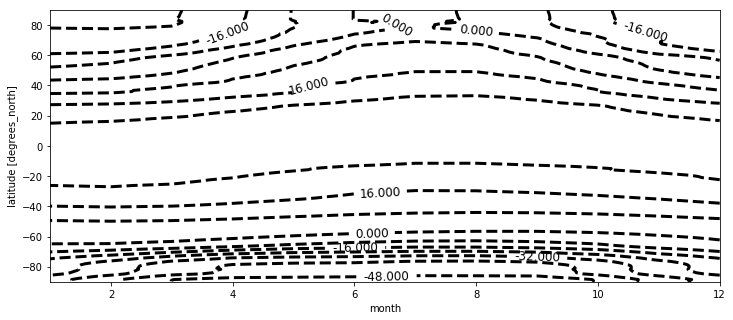

In [43]:
CS = t2m_grouped.T.plot.contour(levels = np.arange(-48,25,8), linewidths = 3, linestyles = 'dashed', colors = 'k'); #CS is the object that is returned by the contour method!
plt.clabel(CS, np.arange(-48,25,16), fontsize = 'large'); #label every second contourline!

`linestyles` can be 'solid', 'dashed', 'dashdot' or 'dotted'. If we do not define any `linestyles`, but force all lines to be the same color, lines with negative values will be dashed by default!

**Contours over a pcolormesh**

It is also possible to put e.g. a pcolormesh plot in the same axes (plot) as a contour plot! This simply means, you that python will plot the contourlines over the pcolormesh.

Here is an example:

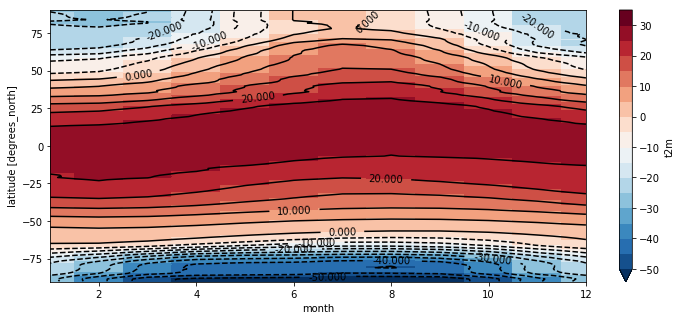

In [44]:
ax = plt.axes()
mesh = t2m_grouped.T.plot.pcolormesh(levels = np.arange(-50, 36, 5)); # plot a pcolormesh first
contours = t2m_grouped.T.plot.contour(levels = np.arange(-50, 36, 5), colors = 'k'); # plot contourlines over it
plt.clabel(contours, np.arange(-50,36,10)) # label every second contour line
ax.set_xlim(1,12); # set xlimits of the plot (of the axes ax)